In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(0)
#Plotly
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#import xgboost
from sklearn.metrics import r2_score

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data (2).csv') 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Lets check the first five rows of data
df.head().style.bar(
    color='#606ff2').background_gradient(cmap='plasma').background_gradient(cmap='plasma')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.000000,1.500000,1340,7912,1.500000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.000000,5.000000,2.500000,3650,9050,2.000000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.000000,3.000000,2.000000,1930,11947,1.000000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.000000,2.250000,2000,8030,1.000000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.000000,2.500000,1940,10500,1.000000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Checking Missing Values 
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# lets check the datatype of features 
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')


,count,mean,std,min,25%,50%,75%,max
price,4600.000000,551962.988473,563834.702547,0.000000,322875.000000,460943.461539,654962.500000,26590000.000000
bedrooms,4600.000000,3.400870,0.908848,0.000000,3.000000,3.000000,4.000000,9.000000
bathrooms,4600.000000,2.160815,0.783781,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,4600.000000,2139.346957,963.206916,370.000000,1460.000000,1980.000000,2620.000000,13540.000000
sqft_lot,4600.000000,14852.516087,35884.436145,638.000000,5000.750000,7683.000000,11001.250000,1074218.000000
floors,4600.000000,1.512065,0.538288,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,4600.000000,0.007174,0.084404,0.000000,0.000000,0.000000,0.000000,1.000000
view,4600.000000,0.240652,0.778405,0.000000,0.000000,0.000000,0.000000,4.000000
condition,4600.000000,3.451739,0.677230,1.000000,3.000000,3.000000,4.000000,5.000000
sqft_above,4600.000000,1827.265435,862.168977,370.000000,1190.000000,1590.000000,2300.000000,9410.000000


Correlation Analysis

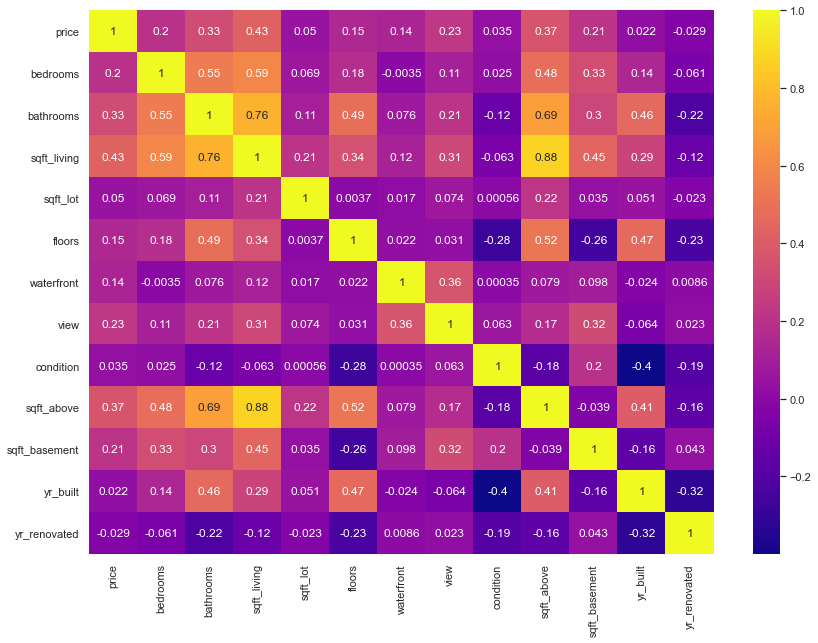

In [8]:
#Correlation plot
plt.figure(figsize=(14,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='plasma')
plt.show()

Analysis of Variable Price

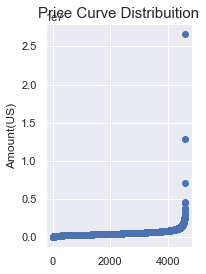

In [9]:
plt.title('Price Distribuition')
sns.distplot(df['price'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.price.values))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()


OverflowError: cannot convert float infinity to integer

<Figure size 1080x432 with 0 Axes>

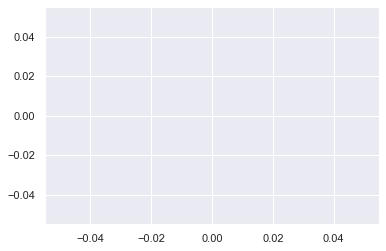

In [11]:
# lets check again the distribution of target variable - price
df1 = df.copy()
df1.price = np.log(df1.price)

plt.figure(figsize=(15,6))
f,ax = plt.subplots(1, sharex=True,)
mean_price = df1['price'].mean()
median_price = df1['price'].median()
mode_price = df1['price'].mode().values[0]

sns.distplot(df1['price'],ax = ax)
ax.axvline(mean_price, color='r', linestyle='--', label="Mean")
ax.axvline(median_price, color='g', linestyle='-', label="Median")
ax.axvline(mode_price, color='b', linestyle='-', label="Mode")

ax.legend()
plt.xlim()
plt.show()

In [12]:
v1 = [go.Box(y=df.price,name="Price",marker=dict(color="rgba(64,64,64,0.9)"),hoverinfo="name+y")]

layout1 = go.Layout(title="Price")

fig1 = go.Figure(data=v1,layout=layout1)
iplot(fig1)

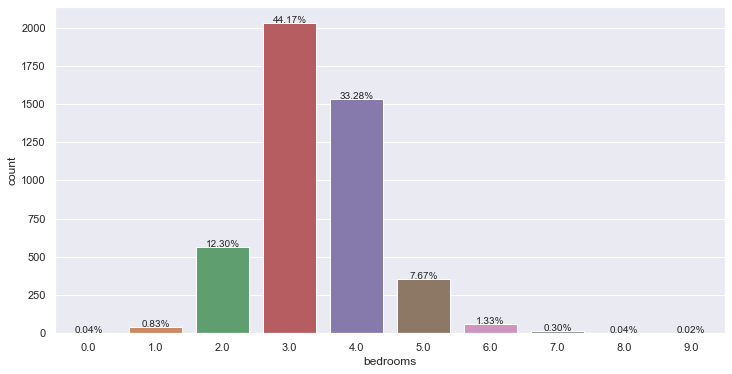

In [13]:
plt.figure(figsize = (12, 6))
total = float(len(df))
ax = sns.countplot(x='bedrooms',data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10) 
plt.show()

In [14]:
v1 = [go.Box(y=df.sqft_living,name="Sqft_living",marker=dict(color="rgba(64,64,64,0.9)"),hoverinfo="name+y")]

layout1 = go.Layout(title="Sqft_living")

fig1 = go.Figure(data=v1,layout=layout1)
iplot(fig1)

Analysis of Variable Floor

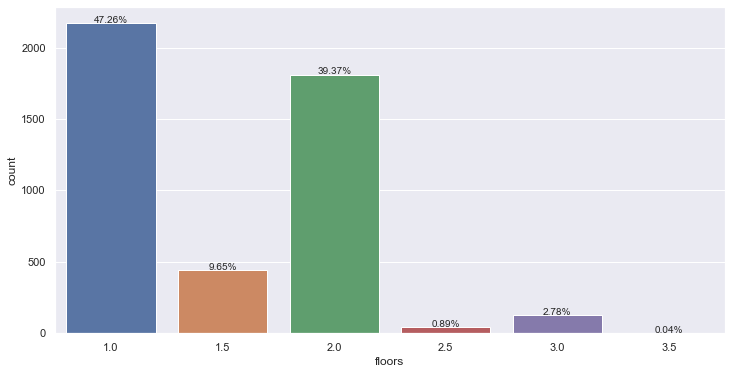

In [15]:
plt.figure(figsize = (12, 6))
total = float(len(df))
ax = sns.countplot(x='floors',data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10) 
plt.show()

Analysis of Variable Waterfront

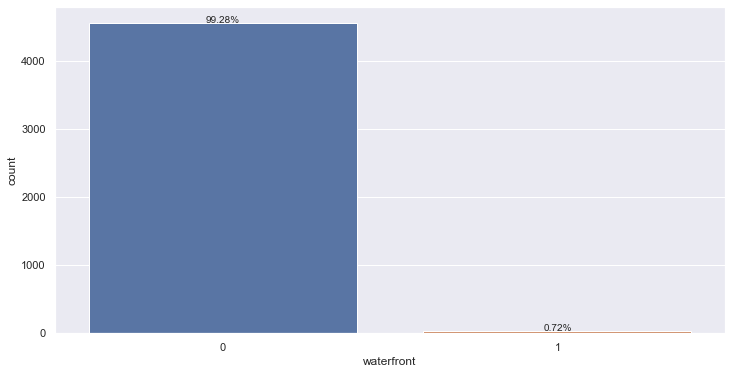

In [16]:
plt.figure(figsize = (12, 6))
total = float(len(df))
ax = sns.countplot(x='waterfront',data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10) 
plt.show()

Analysis of Variable Condition

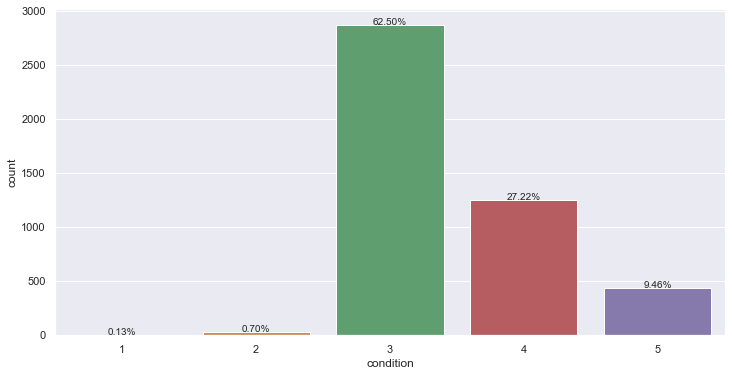

In [17]:
plt.figure(figsize = (12, 6))
total = float(len(df))
ax = sns.countplot(x='condition',data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10) 
plt.show()

Analysis of Variable sqft_above

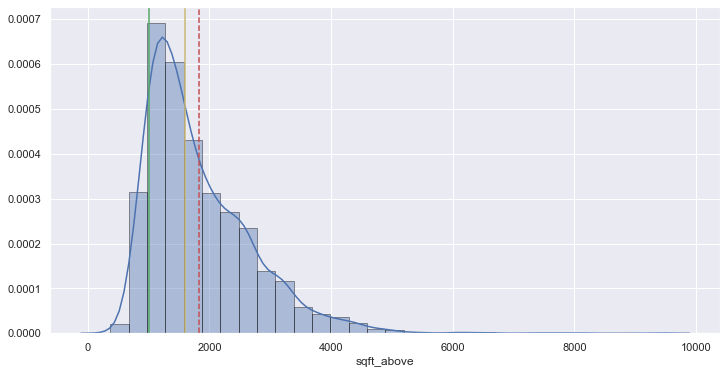

In [18]:
fig,ax = plt.subplots(figsize = (12, 6))
mean=df['sqft_above'].mean()
median=df['sqft_above'].median()
mode=df['sqft_above'].mode()[0]


sns.distplot(df['sqft_above'],kde=True,hist_kws={'edgecolor': 'black'},bins=30,ax=ax)
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='y', linestyle='-')
ax.axvline(mode, color='g', linestyle='-')
plt.show()

Analysis of Variable sqft_basement

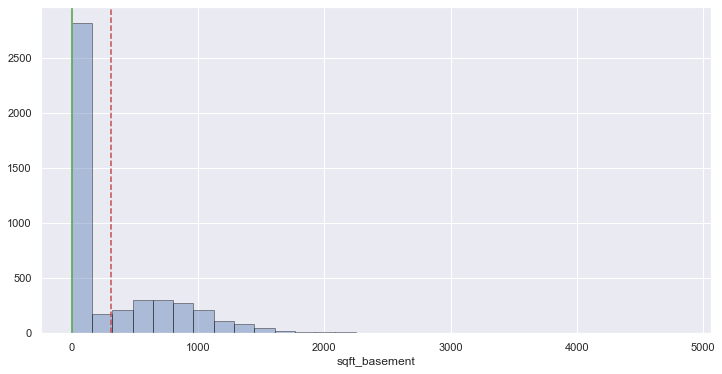

In [19]:
fig,ax = plt.subplots(figsize = (12, 6))
mean=df['sqft_basement'].mean()
median=df['sqft_basement'].median()
mode=df['sqft_basement'].mode()[0]


sns.distplot(df['sqft_basement'],kde=False,hist_kws={'edgecolor': 'black'},bins=30,ax=ax)
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='y', linestyle='-')
ax.axvline(mode, color='g', linestyle='-')
plt.show()

Analysis of Condition vs Price by Waterfront

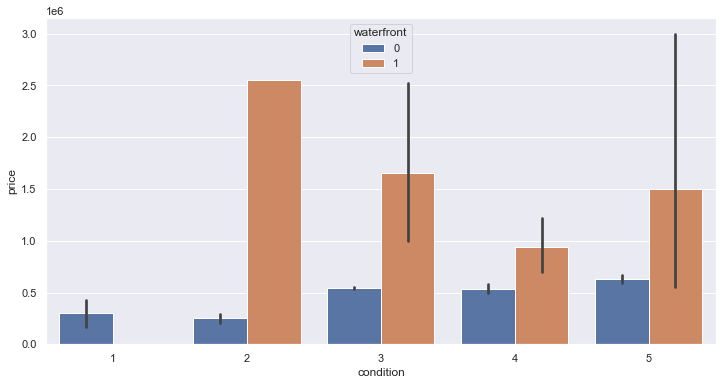

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='condition',y='price',hue='waterfront',data=df)
plt.show()

In [21]:
def preprocess_input(df):
    df = df.copy()
    
    '''Create new columns "Year","Day,"month" from "date" column.
        Drop Id and date column as we already extracted useful features from it.'''
    
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    df.drop(["bedrooms","date"],axis=1,inplace=True)
    
    '''dropping 1% of data as we already knows that price is positive skewed so, to remove that distortion I am dropping those values.'''
    df = df.sort_values(['price'], ascending=False).iloc[int(len(df)*0.01):]
    
    # Creating dependent and independent features 
    y = df['price'].values
    X = df.drop('price',axis=1).values
    
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 50)
    
    
    return X_train, X_test, y_train, y_tes

In [22]:
df = pd.read_csv('data (2).csv') 
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Random Forest

In [23]:
df.drop(["country" , "statezip", "date"], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond


In [26]:
df= pd.get_dummies(df, drop_first=True)
df.head().T

,0,1,2,3,4
price,313000.0,2384000.0,342000.0,420000.00,550000.0
bedrooms,3.0,5.0,3.0,3.00,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5
sqft_living,1340.0,3650.0,1930.0,2000.00,1940.0
sqft_lot,7912.0,9050.0,11947.0,8030.00,10500.0
...,...,...,...,...,...
city_Snoqualmie Pass,0.0,0.0,0.0,0.00,0.0
city_Tukwila,0.0,0.0,0.0,0.00,0.0
city_Vashon,0.0,0.0,0.0,0.00,0.0
city_Woodinville,0.0,0.0,0.0,0.00,0.0


In [28]:
# Features
X = df.drop('price', axis =1).values
# Target
y= df.price.values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train.mean(), X_train.std()

(-1.432550372301983e-19, 0.8696428367229769)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train, y_train)
print("Training accuracy: ", rf_reg.score(X_train, y_train))
print("Testing accuracy: ", rf_reg.score(X_test, y_test))

Training accuracy:  0.9402295346614521
Testing accuracy:  0.059176574425416795
